<img src="//github.com/krishnaik06/Dimesnsionality-Reduction/raw/67a479eaaac811803a7a00bf182062e888d3fd8b//PCA.png">

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

Extracting the cancer dataset from the Sklearn dataset

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
cancer = load_breast_cancer()

In [4]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

Creating a new dataframe with the data and features.

In [7]:
df = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
#(['data', 'target', 'target_names', 'DESCR', 'feature_names'])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


As we can see that the total numbers of features(dimensions) in this dataset are 30. It will be difficult to visulalize all the features(dimentions) at once so we will use the PCA to find the two principle components to visulaize the data in a two-dimentional space with a single scalor product. This requires the data to be be scaled so the features have a single unit variance also called feature scaling. Feature scaling is a method used to normalize the range of independent variables or features of data. In data processing, it is also known as data normalization and is generally performed during the data preprocessing step. See following article on feature scaling. https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/

In this case, we are doing standard normalization where all the values gets rescaled into same unit.

In [8]:
from sklearn.preprocessing import StandardScaler

The data now goes though the scaler fit and tranformation step.

In [9]:
scaler = StandardScaler()
scaler.fit(df)

StandardScaler()

In [10]:
scaled_data =scaler.transform(df)

Python enables PCA by using the Sklearn as a preprocessing step to instantiate PCA object and find the Principle components using the fit method and then apply rotation and dimentionality reduction using the transform() menthod. We can also specify the components we want to keep when creating the PCA objects.

In [13]:
#In this case we have converted our 30 features into 2 features.We could possibly convert this into many features by just specifying the components.
from sklearn.decomposition import PCA 
pca = PCA(n_components=2)

The next step is to do the fit on the scaled data and tranform this data into 2 principle components.

In [14]:
pca.fit(scaled_data)

PCA(n_components=2)

Now we create a new dataset called x_pca which is the transformed dataset with reduced dimentionality.

In [16]:
x_pca = pca.transform(scaled_data)
print(scaled_data.shape)
print(x_pca.shape)

(569, 30)
(569, 2)


As we can see that the features(dimentions) have been reduced from 30 features to 2 features. From what we have seen in our "DESC", there are only two output features we are concerned with : Class Distribution: 212 - Malignant, 357 - Benign. We can try to plot our data to see if we can find any inferences.

Text(0, 0.5, 'Second Principle Component')

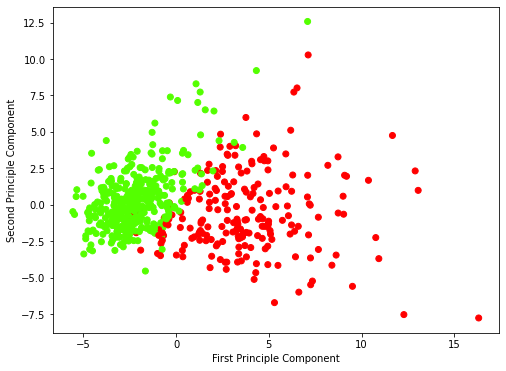

In [19]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=cancer['target'],cmap='prism')
plt.xlabel('First Principle Component')
plt.ylabel('Second Principle Component')

So to summarize our steps here, we first 
- Performed standard scaling
- PCA
    - Fit
    - Tranform
    - 30 dim to 2 dim

This allows us to get the accurate representation for Linear regression, KNN, Decsion tree and Xgboost. This summarizes the dimentionaly reduction of the data.

As the features are now reduced down to 2 components from 30 components, it reduces our understandability of the data of what each components represents.The components correspond to combinations of the original features, the components themselves are stored as an attribute of the fitted PCA object. We can look at each pca components using the numpy which is represented as a vector.

In [20]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

In this numpy matrix array, each row represents a principal component, and each column relates back to the original features. we can visualize this relationship with a heatmap:

<AxesSubplot:>

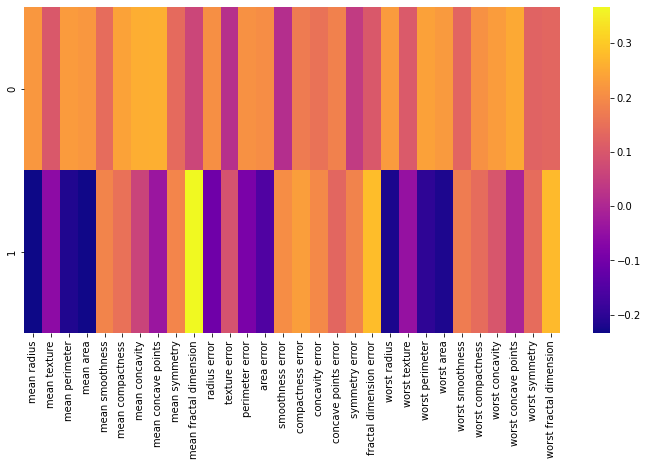

In [22]:
df_components = pd.DataFrame(pca.components_,columns=cancer['feature_names'])
plt.figure(figsize=(12,6))
sns.heatmap(df_components,cmap='plasma',)

This heatmap and the color bar represents the correlation between the various feature and the principal components.